# Assignment 4 DSP : Simulation questions

## Importing the necessary libraries

In [ ]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal
import warnings

warnings.filterwarnings("ignore")

## Q6. 


### (a) Magnitude Response $|H(e^{j\omega})|$ From Z transform

Function to get Z transform

In [ ]:
def Z_transform(num,den,Z):
  Z_num = 0
  Z_den = 0
  for n,i in zip(num,range(0,len(num))):
    Z_num = Z_num + n*(Z**(-i))  
  for d,i in zip(den,range(0,len(den))):
    Z_den = Z_den + d*(Z**(-i))
  return Z_num / Z_den

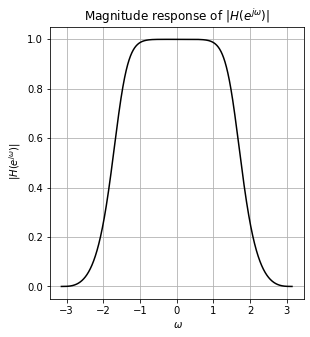

In [ ]:
H_num = np.array([1/6,1/2,1/2,1/6]) #Passing the numerators
H_den = np.array([1,0,1/3]) #Passing the denominators

w = np.arange(-3.14,3.14,0.001) #Defining w range
Z = np.exp(1j*w) #Writing Z = e^(jw)

H = Z_transform(H_num,H_den,Z) #Computing the Z transform of e^(jw) which gives DTFT

figure = plt.figure(figsize = [10,5])
figure.add_subplot(1,2,1)

plt.grid()
plt.title("Magnitude response of $|H(e^{j\omega})|$")
plt.plot(w,np.abs(H),color = "k")
plt.xlabel(" $\omega$")
plt.ylabel(" $ |H(e^{j\omega})|$")
plt.show()

As we can see from above magnitude plot, the filter is a low pass filter since it has non zero magnitude at 0 frequency and zero magnitude at $\pi$ frequency (high frequency). 

### (b) Sketch the Pole Zero Plot.

In [ ]:
def PZplot(H_num,H_den):

  figure = plt.figure(figsize = [10,10])
  ax = figure.add_subplot(1,1,1)

  unit_circle = matplotlib.patches.Circle((0,0),radius=1,fill = False, color = "black")
  ax.add_patch(unit_circle)

  z,p,k = scipy.signal.tf2zpk(H_num,H_den)
  print("Poles : {0}, Zeros : {1}".format(p,z))

  plt.plot(p.real,p.imag,"kx",markersize = 15)
  plt.plot(z.real,z.imag,"ko",markersize = 10,markeredgewidth = 0)
  
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('center')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.grid()
  plt.title("P Z plot")
  plt.legend(["poles","zeros"])
  text = "Number of poles : {0} \nNumber of Zeros : {1} \nPole Locations : {2} \nZero Locations : {3}".format(len(p),len(z),np.round(p,3),np.round(z,3))
  plt.text(1,-1,text)
  plt.xlim(-2,2)
  plt.ylim(-2,2)
  plt.show()


Poles : [-0.+0.57735027j  0.-0.57735027j], Zeros : [-0.99999672+5.68937417e-06j -0.99999672-5.68937417e-06j
 -1.00000657+0.00000000e+00j]


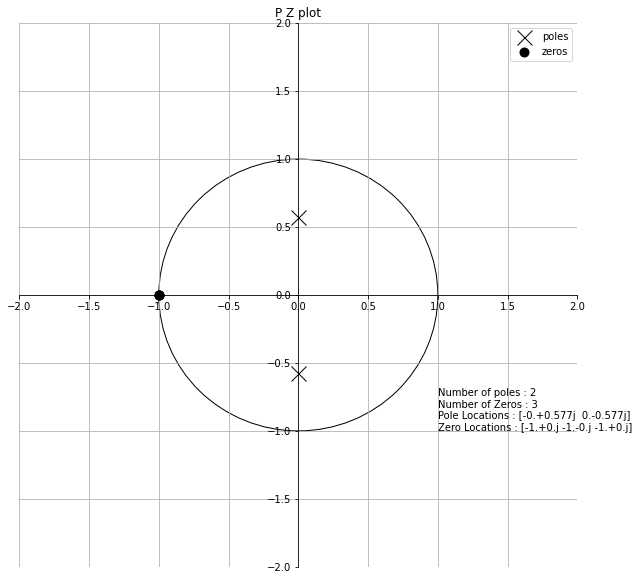

In [ ]:
PZplot(H_num,H_den)

Since the poles are inside the unit circle, the system is stable since it's causal and causal systems have ROC outwards. Hence stable system as ROC contains unit circle.

### (c) Magnitude of $|X(e^{j\omega})|$ 

$$
x[n] =
\begin{cases}
0 & \text{$n = 1,2,3,...,50$} \\
1 & \text{$n = 50,51,...,128$}\\
\end{cases}
$$

 


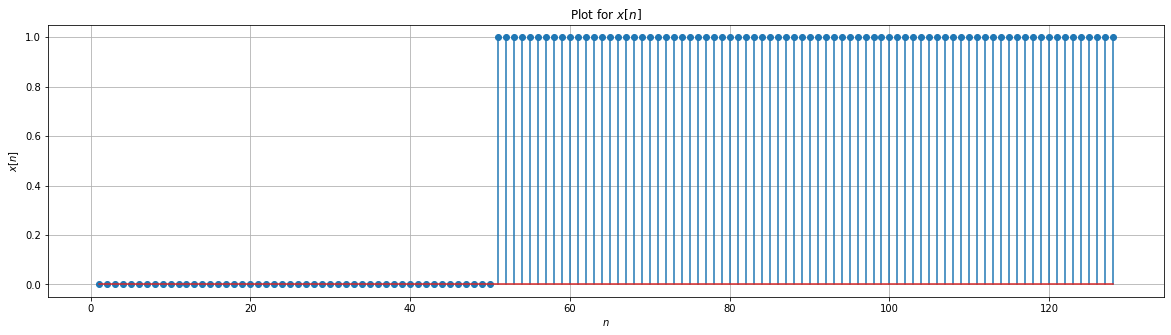

In [ ]:
x = np.concatenate((np.zeros((50,1),dtype=np.uint8),np.ones((128-50,1),dtype=np.uint8)),axis=0)
n = np.arange(1,129,1)

plt.figure(figsize=[20,5])
plt.title("Plot for $x[n]$")
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.grid()
plt.stem(n,x)
plt.show()

Here, we have used plots rather than stem plots as the number of samples increase, the stem plots become more and more conjusted.

Also we are using the 0 padded version of x[n] to get a more accurate DTFT representation of the signal.

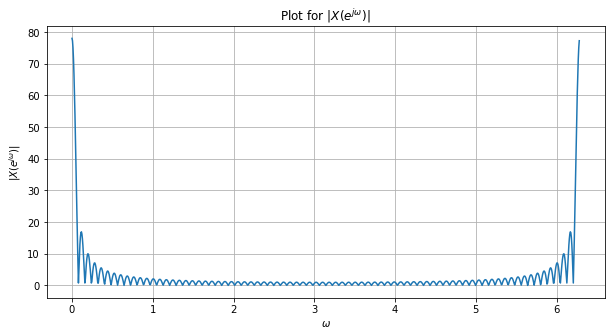

In [ ]:
x_modified = np.concatenate((np.zeros((1,1)),x.reshape((1,-1)),np.zeros((1,1024-129))),axis=1) #Padding with zeros to get a smooth |X(e^jw)|

X = np.fft.fft(x_modified,axis=1) #Calculating the Fourier transform of modified x[n]
Mag_X = (np.abs(X).reshape((-1,1))) #Calculating Magnitude of X in log scale

w = np.linspace(0,6.28,len(Mag_X))
plt.figure(figsize=[10,5])
plt.title("Plot for $|X(e^{j\omega})|$")
plt.xlabel("$\omega$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.grid()
plt.plot(w,Mag_X)
plt.show()

### (d) $|Y(e^{j\omega})|$ and $y[n]$



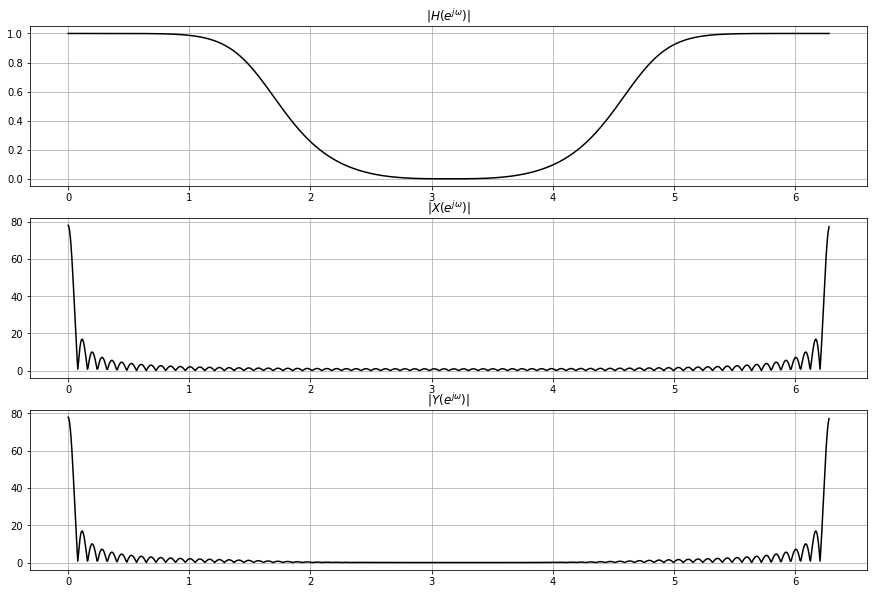

In [ ]:
Z = np.exp(1j*w)
H = Z_transform(H_num,H_den,Z)
H = np.reshape(H,(-1,1))
X = np.reshape(X,(-1,1))

Y = H*X

fig = plt.figure(figsize = [15,10])
fig.add_subplot(3,1,1)
plt.plot(w,np.abs(H),color="k")
plt.title("$|H(e^{j\omega})|$")
plt.grid()

fig.add_subplot(3,1,2)
plt.plot(w,np.abs(X),color="k")
plt.title("$|X(e^{j\omega})|$")
plt.grid()

fig.add_subplot(3,1,3)
plt.plot(w,np.abs(Y),color="k")
plt.title("$|Y(e^{j\omega})|$")
plt.grid()

plt.show()

Thus as we can see, $Y(e^{j\omega})$ has it's higher frequencies attenuated after obtaining :

>> $Y(e^{j\omega})$ = $X(e^{j\omega})$ $\cdot$ $H(e^{j\omega})$ 

Now we can compute $y[n]$ in two different ways :

1) Directly taking Inverse Fourier Transform of $Y(e^{j\omega})$

2) Using convolution of $h[n]$ and $x[n]$

Number of samples in y[n] : 
Using Inverse Fourier Transform : 1024 
Using convolution : 1151


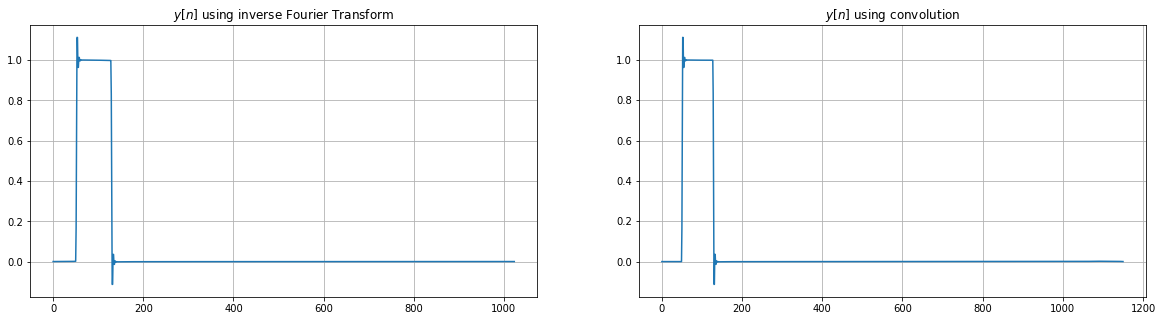

In [ ]:
y1 = np.fft.ifft(Y,axis=0)
h = np.fft.ifft(H,axis=0)
y2 = np.convolve(x.reshape(-1,),h.reshape(-1,),mode="full")

print("Number of samples in y[n] : \nUsing Inverse Fourier Transform : {0} \nUsing convolution : {1}".format(len(y1),len(y2)))

figure = plt.figure(figsize = [20,5])

figure.add_subplot(1,2,1)
plt.plot(np.real(y1))
plt.title("$y[n]$ using inverse Fourier Transform")
plt.grid()

figure.add_subplot(1,2,2)
plt.plot(np.real(y2))
plt.title("$y[n]$ using convolution")
plt.grid()

plt.show()


Since x[n] has 128 samples and h[n] has 1024 samples, total samples in y[n] using convolution is 128 + 1024 - 1 = 1151

###(e) Form of y[n]

Let's take a closer look at corners of the obtained y[n]

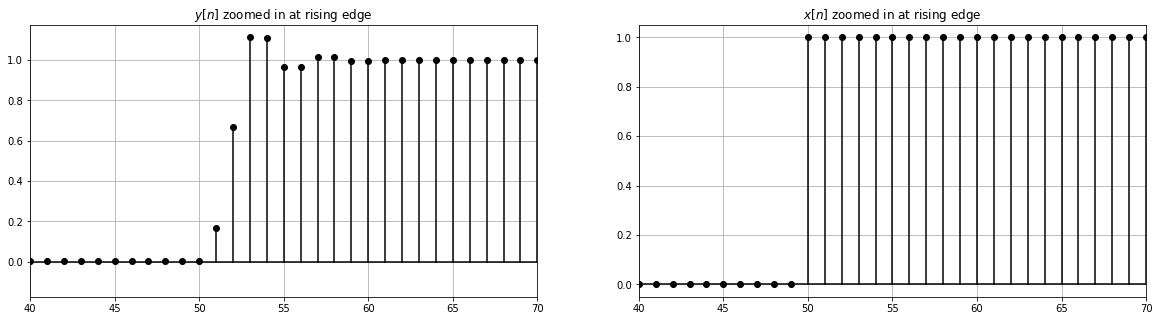

In [ ]:
figure = plt.figure(figsize = [20,5])

figure.add_subplot(1,2,1)
plt.stem(np.real(y1),linefmt="k",markerfmt="ko",basefmt="k")
plt.title("$y[n]$ zoomed in at rising edge")
plt.xlim(40,70)
plt.grid()

figure.add_subplot(1,2,2)
plt.stem(x,linefmt="k",markerfmt="ko",basefmt="k")
plt.title("$x[n]$ zoomed in at rising edge")
plt.xlim(40,70)
plt.grid()

plt.show()

We can clearly see that the rising edge of $y[n]$ doesn't rise as sharply as the original $x[n]$. This is due to the fact that $H(e^{j\omega})$ is a low pass filter which filters out the high frequency components. As a result the sharp rising edge (and even falling edge) of $x[n]$ which contribute towards high frequency of $x[n]$ get filtered out we obtain a smoother rise (and fall) in filtered out $y[n]$

## Q7.

### (a) Ideal Low pass filter with cutoff $\omega_c = \frac{\pi}{2}$ on a Gaussian pulse.

A function which returns LPF with cutoff $\omega_c$ and $k$ where $k = \pi / \omega_c$. $k$ is for finding the sinc pulse.

In [ ]:
def get_LPF(n,wc):

  k = np.pi // wc
  LPF = np.sinc(n/k)/k
  return k,LPF

In [ ]:
def get_delayed_signal(x,y):

  x_new = np.convolve(x,y)
  n_new = np.arange(-200,201,1)
  return n_new,x_new

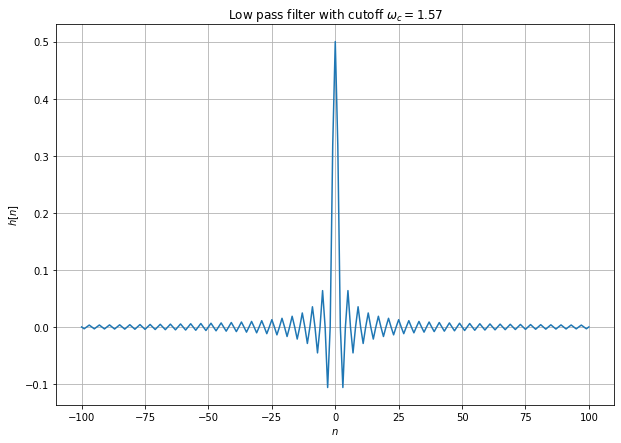

In [ ]:
n = np.arange(-100,101,1)
g = np.exp(-n**2 / 400)

wc = np.pi/2

k,LPF = get_LPF(n,wc)

plt.figure(figsize = [10,7])
plt.plot(n,LPF)
plt.title("Low pass filter with cutoff $\omega_c = ${:.3}".format(wc))
plt.xlabel("$n$")
plt.ylabel("$h[n]$")
plt.grid()
plt.show()

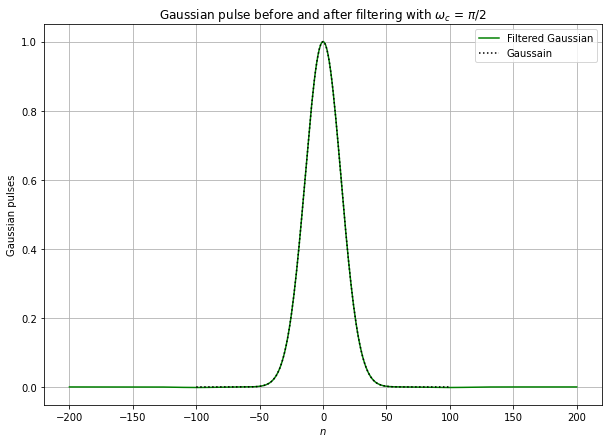

In [ ]:
n_new,g_new = get_delayed_signal(g,LPF)
plt.figure(figsize = [10,7])
plt.plot(n_new,g_new,color = "green")
plt.plot(n,g,color="k",linestyle="dotted")
plt.title("Gaussian pulse before and after filtering with $\omega_c$ = $\pi$/{0}".format(int(k)))
plt.xlabel("$n$")
plt.ylabel("Gaussian pulses")
plt.grid()
plt.legend(["Filtered Gaussian","Gaussain"])
plt.show()

In [ ]:
Max = -200 + np.where(g_new == np.max(g_new))[0][0]
print("The maximum is at n = {0}".format(Max))
print("The delay is by n = {0} samples".format(Max))

The maximum is at n = 0
The delay is by n = 0 samples


## (b) For cutoff frequencies $\omega_c$=$\frac{\pi}{4}$,$\frac{3\pi}{4} $

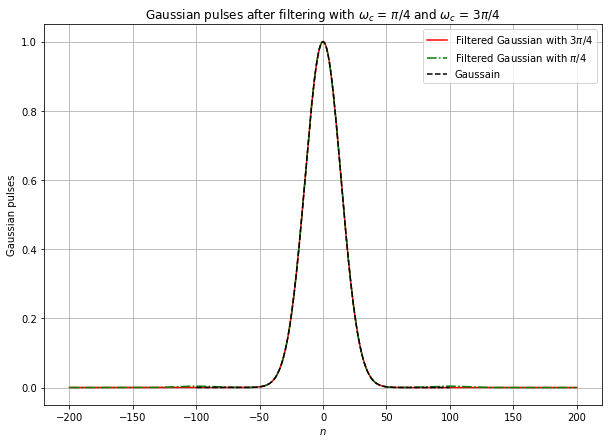

In [ ]:
_,LPF_1 = get_LPF(n,np.pi/4)
_,LPF_2 = get_LPF(n,3*np.pi/4)

n_new_1,g_new_1 = get_delayed_signal(g,LPF_1)
n_new_2,g_new_2 = get_delayed_signal(g,LPF_2)

plt.figure(figsize = [10,7])
plt.plot(n_new_2,g_new_2,color = "red",linestyle="solid")
plt.plot(n_new_1,g_new_1,color = "green",linestyle="dashdot")
plt.plot(n,g,color="k",linestyle="dashed")
plt.title("Gaussian pulses after filtering with $\omega_c$ = $\pi$/4 and $\omega_c$ = $3\pi$/4")
plt.xlabel("$n$")
plt.ylabel("Gaussian pulses")
plt.grid()
plt.legend(["Filtered Gaussian with $3\pi/4$","Filtered Gaussian with $\pi/4$","Gaussain"])
plt.show()

We can see that all of the graphs overlap each other. Since the LPF is centred at 0, it does not introduce any phase difference, thus we get back the original signal without any phase change. Irrespective of the cutoff frequencies.

###(c) Gaussian filtered with High Pass Filter 

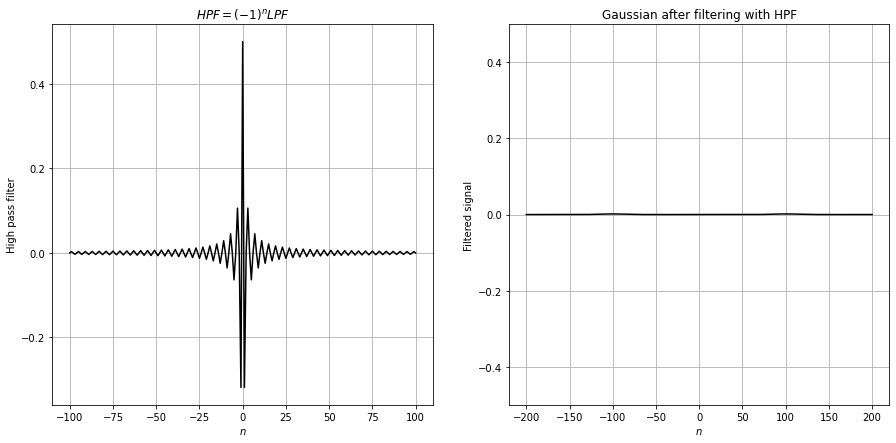

In [ ]:
HPF = np.where(n % 2 == 0 , LPF, -LPF) #HPF by multiplying with -1 whenever n is odd, else multiply with 1

n_new_3,g_new_3 = get_delayed_signal(g,HPF) #convolving with original signal

figure = plt.figure(figsize=[15,7])

figure.add_subplot(1,2,1)
plt.plot(n,HPF,color="k")
plt.title("$HPF = (-1)^{n}LPF$")
plt.xlabel("$n$")
plt.ylabel("High pass filter")
plt.grid()


figure.add_subplot(1,2,2) 
plt.plot(n_new_3,g_new_3,color="k")
plt.title("Gaussian after filtering with HPF")
plt.xlabel("$n$")
plt.ylabel("Filtered signal")
plt.ylim(-0.5,0.5)
plt.grid()

plt.show()

Here, we can see that the signal is completely filtered out. The reason being, Gaussian pulse is a low pass filter with frequency response also a LPF gaussian. So when we multiply Gaussian with a high pass filter, the fourier Transform are multiplied, resulting into 0 magnitude response. Hence we observe that output is not present in the filtered response.

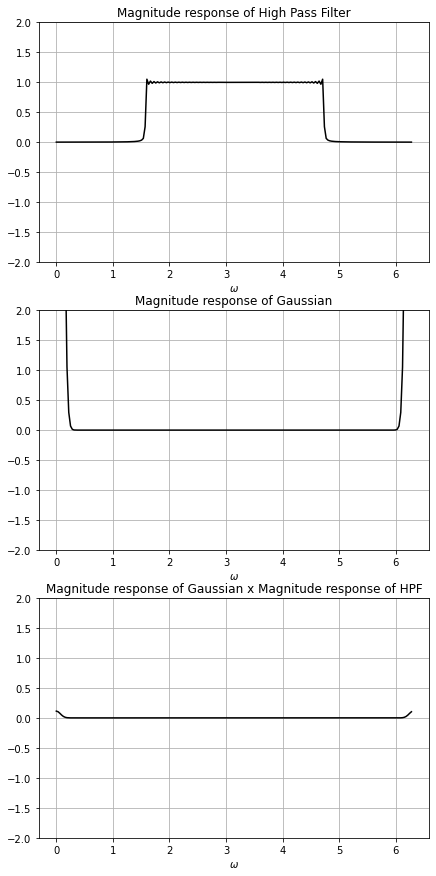

In [ ]:
figure = plt.figure(figsize = [7,15])

w = np.linspace(0,6.28,201)

figure.add_subplot(3,1,1)
plt.plot(w,np.abs(np.fft.fft(HPF)),color="k")
plt.grid()
plt.title("Magnitude response of High Pass Filter")
plt.xlabel("$\omega$")
plt.ylim(-2,2)

figure.add_subplot(3,1,2)
plt.plot(w,np.abs(np.fft.fft(g)),color="k")
plt.grid()
plt.title("Magnitude response of Gaussian")
plt.xlabel("$\omega$")
plt.ylim(-2,2)

figure.add_subplot(3,1,3)
plt.plot(w,np.abs(np.fft.fft(HPF))*np.abs(np.fft.fft(g)),color="k")
plt.grid()
plt.title("Magnitude response of Gaussian x Magnitude response of HPF")
plt.xlabel("$\omega$")
plt.ylim(-2,2)

plt.show()